In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px


In [29]:
data = pd.read_csv("lung_cancer.csv")
data = data[~data.apply(lambda row: row.astype(str).str.contains(r'\?').any(), axis=1)]
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,target
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
5,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2


In [30]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1 to 31
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   feature_0   27 non-null     int64 
 1   feature_1   27 non-null     int64 
 2   feature_2   27 non-null     int64 
 3   feature_3   27 non-null     int64 
 4   feature_4   27 non-null     object
 5   feature_5   27 non-null     int64 
 6   feature_6   27 non-null     int64 
 7   feature_7   27 non-null     int64 
 8   feature_8   27 non-null     int64 
 9   feature_9   27 non-null     int64 
 10  feature_10  27 non-null     int64 
 11  feature_11  27 non-null     int64 
 12  feature_12  27 non-null     int64 
 13  feature_13  27 non-null     int64 
 14  feature_14  27 non-null     int64 
 15  feature_15  27 non-null     int64 
 16  feature_16  27 non-null     int64 
 17  feature_17  27 non-null     int64 
 18  feature_18  27 non-null     int64 
 19  feature_19  27 non-null     int64 
 20  feature_20  27 no

,feature_0,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,target
count,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2.037037,0.0,2.370370,2.296296,0.259259,2.259259,2.074074,2.407407,1.111111,1.370370,...,2.074074,2.074074,2.000000,2.037037,2.000000,1.888889,1.851852,1.592593,1.851852,1.703704
std,0.807726,0.0,0.564879,0.724028,0.446576,0.712125,0.780824,0.797074,0.423659,0.564879,...,0.266880,0.266880,0.392232,0.337580,0.480384,0.423659,0.456045,0.500712,0.362014,0.465322
min,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.0,2.000000,2.000000,0.000000,2.000000,1.500000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.0,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.0,3.000000,3.000000,0.500000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,0.0,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [31]:
dataset = data.copy()
dataset.info()
dataset.describe()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1 to 31
Data columns (total 57 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   feature_0   27 non-null     int64 
 1   feature_1   27 non-null     int64 
 2   feature_2   27 non-null     int64 
 3   feature_3   27 non-null     int64 
 4   feature_4   27 non-null     object
 5   feature_5   27 non-null     int64 
 6   feature_6   27 non-null     int64 
 7   feature_7   27 non-null     int64 
 8   feature_8   27 non-null     int64 
 9   feature_9   27 non-null     int64 
 10  feature_10  27 non-null     int64 
 11  feature_11  27 non-null     int64 
 12  feature_12  27 non-null     int64 
 13  feature_13  27 non-null     int64 
 14  feature_14  27 non-null     int64 
 15  feature_15  27 non-null     int64 
 16  feature_16  27 non-null     int64 
 17  feature_17  27 non-null     int64 
 18  feature_18  27 non-null     int64 
 19  feature_19  27 non-null     int64 
 20  feature_20  27 no

(27, 57)

In [32]:
np.random.seed(42)
missing_rate = 0.2  # 20% missing
missing_indices = dataset.sample(frac=missing_rate, random_state=42).index
dataset.loc[missing_indices, 'target'] = np.nan
dataset.isnull().sum()

feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
feature_50    0
feature_51    0
feature_52    0
feature_53    0
feature_54    0
feature_55    0
target        5
dtype: int64

In [33]:
  #print(dataset.isnull().sum())
missing_indices = dataset[dataset['target'].isna()].index
y_TEST = data.loc[missing_indices, 'target']
y_TEST

1     2
9     2
10    2
15    2
26    1
Name: target, dtype: int64

In [34]:
missing_data = dataset[dataset['target'].isna()]
non_missing_data = dataset[dataset['target'].notna()]

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [36]:
X_complete = non_missing_data.drop(columns=['target'])
y_complete = non_missing_data['target']
X_missing = missing_data.drop(columns=['target'])

# 1. Mean/Median Imputation

In [37]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

In [38]:
mean_imputed = mean_imputer.fit_transform(y_complete.values.reshape(-1, 1))
median_imputed = median_imputer.fit_transform(y_complete.values.reshape(-1, 1))

In [39]:
missing_data_mean = missing_data.copy()
missing_data_mean['Class'] = mean_imputer.transform(missing_data_mean['target'].values.reshape(-1, 1))

In [40]:
missing_data_median = missing_data.copy()
missing_data_median['target'] = median_imputer.transform(missing_data_median['target'].values.reshape(-1, 1))

In [41]:
datasets_mean_filled = pd.concat([non_missing_data, missing_data_mean]).sort_index()
datasets_median_filled = pd.concat([non_missing_data, missing_data_median]).sort_index()

In [42]:
# Imputed 'target' values for missing rows
mean_pred = mean_imputer.transform(missing_data['target'].values.reshape(-1, 1))
median_pred = median_imputer.transform(missing_data['target'].values.reshape(-1, 1))

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Flatten predicted values
mean_pred_flat = mean_pred.flatten()
median_pred_flat = median_pred.flatten()
y_true = y_TEST.values

# Mean Imputation Errors
mae_mean = mean_absolute_error(y_true, mean_pred_flat)
rmse_mean = np.sqrt(mean_squared_error(y_true, mean_pred_flat))

# Median Imputation Errors
mae_median = mean_absolute_error(y_true, median_pred_flat)
rmse_median = np.sqrt(mean_squared_error(y_true, median_pred_flat))

# Display results
print("📊 Mean Imputation:")
print(f"MAE: {mae_mean:.2f}, \nRMSE: {rmse_mean:.2f}")

print("\n📊 Median Imputation:")
print(f"MAE: {mae_median:.2f}, \nRMSE: {rmse_median:.2f}")


📊 Mean Imputation:
MAE: 0.39, 
RMSE: 0.42

📊 Median Imputation:
MAE: 0.20, 
RMSE: 0.45


# 2. K-NN Imputation

In [44]:
knn_imputer = KNNImputer(n_neighbors=5)
# Combine features and target for k-NN imputation
knn_data = pd.concat([X_complete, y_complete], axis=1)
knn_imputed = knn_imputer.fit_transform(knn_data)
knn_imputed_scores = knn_imputed[-len(X_missing):, -1]

In [45]:
from sklearn.impute import KNNImputer

# Combine features and target (including missing target values!)
knn_input = dataset.copy()

# Apply KNN Imputer on full data
knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_input)

# Create imputed DataFrame
imputed_datasets = pd.DataFrame(imputed_array, columns=dataset.columns, index=dataset.index)

# Extract only the imputed target for missing rows
dataset.loc[missing_indices, 'target'] = imputed_datasets.loc[missing_indices, 'target']

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = dataset.loc[missing_indices, 'target']
y_true = y_TEST  # original values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("📊 KNN Imputation Evaluation:")
print(f"✅ MAE : {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")

📊 KNN Imputation Evaluation:
✅ MAE : 0.40
✅ RMSE: 0.52


# 3. MICE Imputation

In [46]:
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Define MICE Imputer with a stronger estimator
mice_imputer = IterativeImputer(
    estimator=GradientBoostingRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
)

# 2. Combine features + target
mice_data = pd.concat([X_complete, y_complete], axis=1)

# 3. Fit-transform the complete data
mice_imputed = mice_imputer.fit_transform(mice_data)

# 4. Convert back to DataFrame for easy access
mice_imputed_df = pd.DataFrame(mice_imputed, columns=mice_data.columns, index=mice_data.index)

# 5. Train imputer again on full data (optional) and transform missing part
full_data = pd.concat([X_complete, X_missing])
mice_imputer.fit(mice_data)
missing_data_mice = pd.concat([X_missing, pd.Series([np.nan]*len(X_missing), name='target', index= X_missing.index)], axis=1)
mice_imputed_missing = mice_imputer.transform(missing_data_mice)
mice_imputed_scores = mice_imputed_missing[:, -1]



In [47]:
# 6. Evaluate against ground truth
mae_mice = mean_absolute_error(y_TEST, mice_imputed_scores)
rmse_mice = np.sqrt(mean_squared_error(y_TEST, mice_imputed_scores))

print("📊 MICE Imputation Evaluation (with GradientBoostingRegressor):")
print(f"✅ MAE : {mae_mice:.2f}")
print(f"✅ RMSE: {rmse_mice:.2f}")

📊 MICE Imputation Evaluation (with GradientBoostingRegressor):
✅ MAE : 0.22
✅ RMSE: 0.45


# 4. Random Forest Imputation

In [48]:
# Features (X) and target (y) from non-missing data
X = non_missing_data.drop(columns=['target'])
y = non_missing_data['target']

# Features for missing data (to be imputed)
X_missing = missing_data.drop(columns=['target'])

# True values for missing data (y_TEST)
y_true = y_TEST  

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_val_pred = model.predict(X_val)
# Calculate MAE and MSE
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

# Manually calculate RMSE from MSE
rmse_val = np.sqrt(mse_val)

print("📊 Random Forest Imputation Evaluation:")
print(f"✅Validation MAE: {mae_val:.2f}")
print(f"✅Validation RMSE: {rmse_val:.2f}")

📊 Random Forest Imputation Evaluation:
✅Validation MAE: 0.41
✅Validation RMSE: 0.43


In [52]:
y_missing_pred = model.predict(X_missing)

# Calculate metrics for missing data predictions
mae_missing = mean_absolute_error(y_true, y_missing_pred)
mse_missing = mean_squared_error(y_true, y_missing_pred)
rmse_missing = np.sqrt(mse_missing)

print(f"\n✅Imputation MAE (vs y_TEST): {mae_missing:.2f}")
print(f"✅Imputation RMSE (vs y_TEST): {rmse_missing:.2f}")


✅Imputation MAE (vs y_TEST): 0.46
✅Imputation RMSE (vs y_TEST): 0.52


🔍 Imputation Results Summary:
               Mean  Median      k-NN      MICE  Random Forest
count  5.000000e+00     5.0  5.000000  5.000000       5.000000
mean   1.681818e+00     2.0  1.600000  1.977386       1.642000
std    2.482534e-16     0.0  0.547723  0.050548       0.223652
min    1.681818e+00     2.0  1.000000  1.886962       1.320000
25%    1.681818e+00     2.0  1.000000  1.999992       1.520000
50%    1.681818e+00     2.0  2.000000  1.999992       1.720000
75%    1.681818e+00     2.0  2.000000  1.999992       1.760000
max    1.681818e+00     2.0  2.000000  1.999992       1.890000


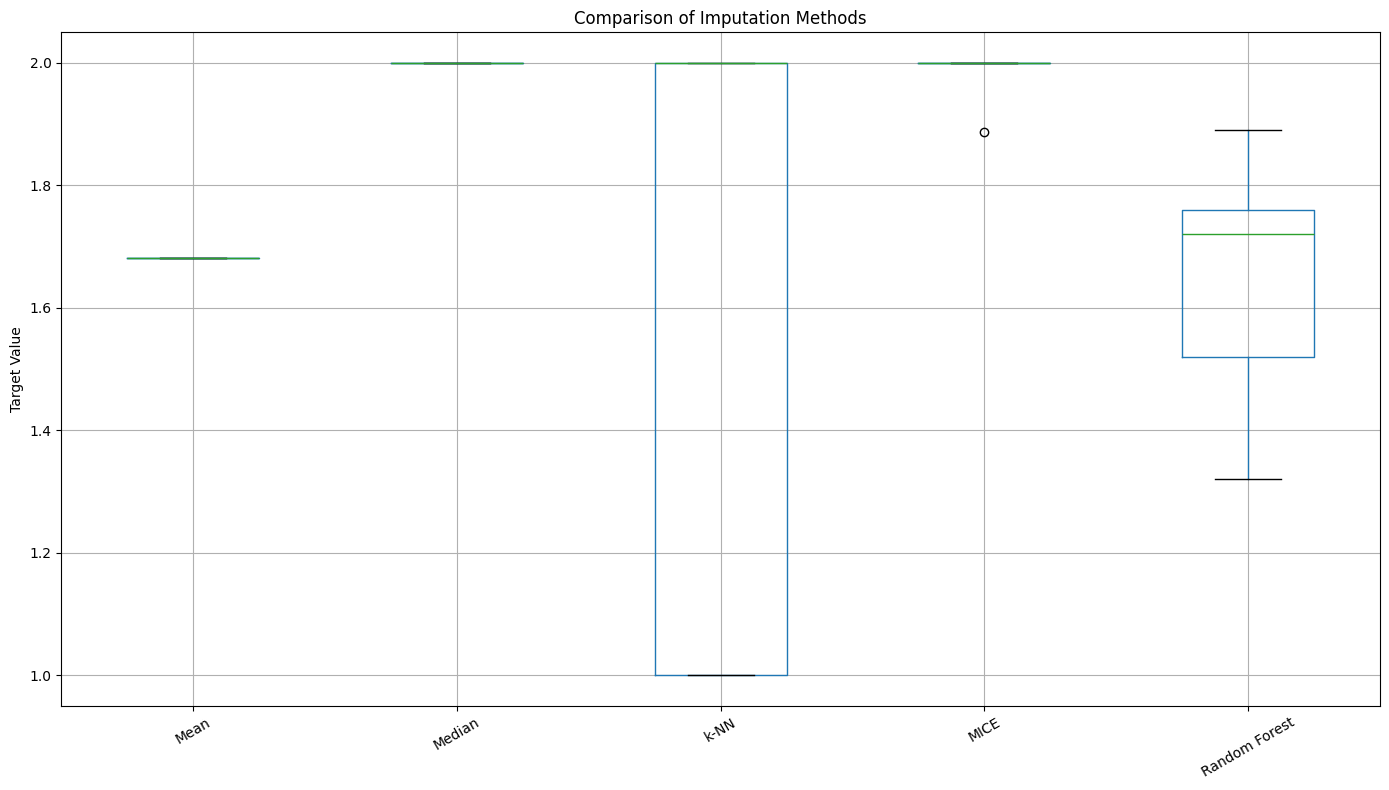

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a results DataFrame comparing all methods
results = pd.DataFrame({
    'Mean': mean_pred[:len(X_missing)].flatten(),
    'Median': median_pred[:len(X_missing)].flatten(),
    'k-NN': knn_imputed_scores,
    'MICE': mice_imputed_scores,
    'Random Forest': y_missing_pred 
    
})

# Summary statistics
print("🔍 Imputation Results Summary:")
print(results.describe())

# Visualization using box plot
plt.figure(figsize=(14, 8))
results.boxplot()
plt.title("Comparison of Imputation Methods")
plt.ylabel("Target Value")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_19352\3425954819.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19352\3425954819.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


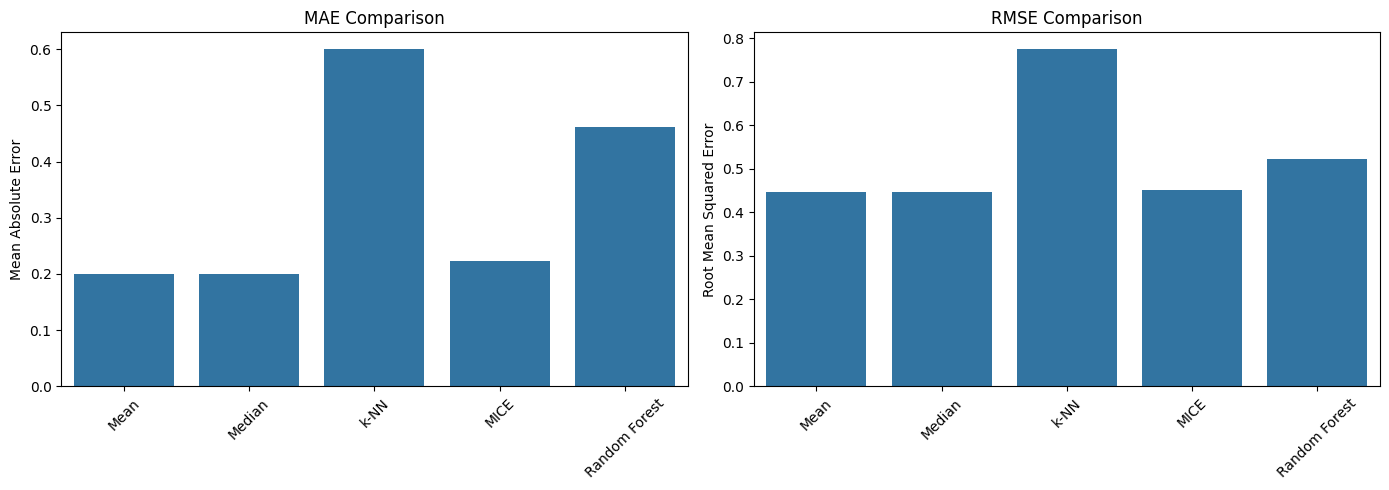

In [54]:
# Define MAE and RMSE values for each model
mae_scores = {
    'Mean': mean_absolute_error(y_TEST, mean_imputed[:len(y_TEST)].flatten()),
    'Median': mean_absolute_error(y_TEST, median_imputed[:len(y_TEST)].flatten()),
    'k-NN': mean_absolute_error(y_TEST, knn_imputed_scores),
    'MICE': mean_absolute_error(y_TEST, mice_imputed_scores),
    'Random Forest': mean_absolute_error(y_TEST, y_missing_pred),
    
}

rmse_scores = {
    'Mean': np.sqrt(mean_squared_error(y_TEST, mean_imputed[:len(y_TEST)].flatten())),
    'Median': np.sqrt(mean_squared_error(y_TEST, median_imputed[:len(y_TEST)].flatten())),
    'k-NN': np.sqrt(mean_squared_error(y_TEST, knn_imputed_scores)),
    'MICE': np.sqrt(mean_squared_error(y_TEST, mice_imputed_scores)),
    'Random Forest': np.sqrt(mean_squared_error(y_TEST, y_missing_pred)),
    
}

# Bar plots for MAE and RMSE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=list(mae_scores.keys()), y=list(mae_scores.values()), ax=axes[0])
axes[0].set_title('MAE Comparison')
axes[0].set_ylabel('Mean Absolute Error')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.barplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()), ax=axes[1])
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('Root Mean Squared Error')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
